# Day 3 : Data Loading and Manipulation and Visulatiozation

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, seaborn, LASIO, Welly

## Kindly load the las file of F02-1_logs.las well from the data folder
## Perform the below Tasks:

>1. Plot well logs using matplotlib for every well-log in the las file
2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.
3. Calculate the VP log from the DT sonic curve.
4. Calculate the VP log using AI and RHOB log.
5. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes? 

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb
import lasio

In [2]:
# read las file
F02 = lasio.read("Dutch_F3_Logs\F02-1_logs.las")
# Into dataframe
df = F02.df()
# Curves?
print ('curves: ', F02.keys())

curves:  ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']


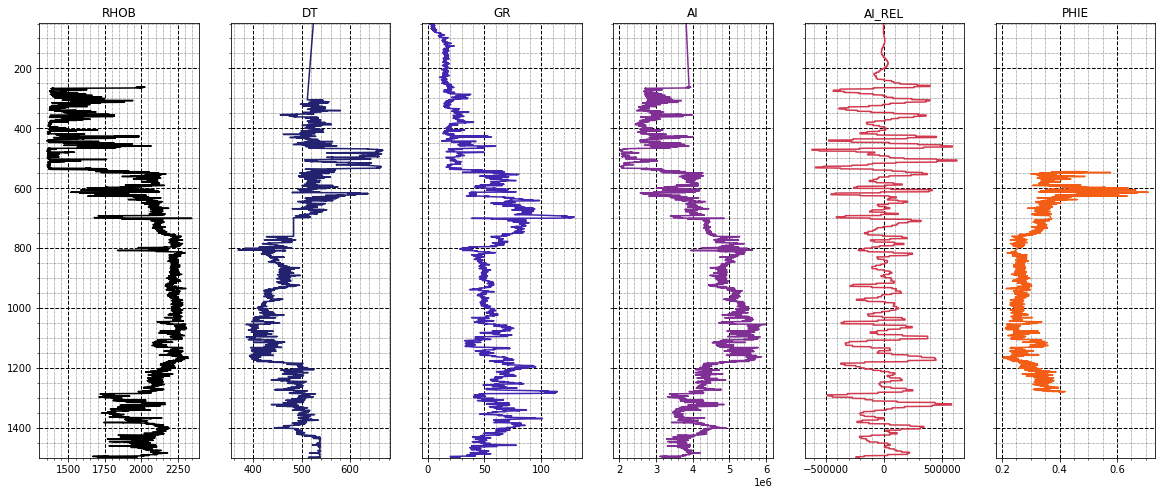

In [3]:
#1. Plot well logs using matplotlib for every well-log in the las file

import matplotlib as mpl

rows, cols = 1, df.shape[1]

cmap = mpl.cm.CMRmap

fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,8), sharey=True)
names = [ 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE']
colrs = [ 'red', 'green', 'blue', 'orange', 'blue', 'black']
for i in range(cols):
    ax[i].plot(df.iloc[:,i], df.index ,linewidth='1.5', color = cmap(i/9))
    ax[i].set_ylim(max(df.index), min(df.index))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle='dashed', linewidth='1', color='black')
    ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
    ax[i].set_title('%s' %names[i])

In [4]:
#2. Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.1,0.25,0.5,0.75,0.9]) + 10 and 90% percentiles.
df.dropna(inplace=True)
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,RHOB,DT,GR,AI,AI_REL,PHIE
count,4906.000000,4906.000000,4906.000000,4.906000e+03,4906.000000,4906.000000
mean,2155.948824,465.387235,60.724800,4.689328e+06,12306.922104,0.304522
std,110.901473,44.431661,15.915596,6.150367e+05,170707.221466,0.064282
min,1515.571300,368.114700,28.170500,2.567369e+06,-453036.312500,0.203900
10%,2041.412200,408.627350,44.045600,3.901248e+06,-202133.125000,0.244350
25%,2103.774150,430.888100,49.218325,4.258841e+06,-88126.375000,0.257900
50%,2190.447900,462.271000,57.712050,4.772372e+06,17309.205100,0.283000
75%,2234.970650,495.231225,70.230100,5.157895e+06,108839.296900,0.339800
90%,2258.298700,523.619850,82.061000,5.490975e+06,207693.093800,0.371300
max,2346.629200,637.030500,129.177300,5.983779e+06,449544.593800,0.709000


In [5]:
#3. Calculate the VP log from the DT sonic curve.
df['VP'] = 1000000/df['DT']
df.VP

DEPTH
544.2000     1916.296917
544.3500     1925.025271
544.5000     1930.393113
544.6500     1903.054955
544.8000     1861.998710
                ...     
1279.3501    1991.290890
1279.5000    1997.603276
1279.6500    2004.034522
1279.8000    2002.769430
1279.9501    2006.758764
Name: VP, Length: 4906, dtype: float64

In [6]:
#4. Calculate the VP log using AI and RHOB log.
df['VP_2']= df['AI']/df['RHOB']
df.VP_2

DEPTH
544.2000     1916.354126
544.3500     1925.046009
544.5000     1930.398150
544.6500     1903.083215
544.8000     1862.162218
                ...     
1279.3501    1991.280366
1279.5000    1997.612755
1279.6500    2004.054595
1279.8000    2002.781834
1279.9501    2006.770728
Name: VP_2, Length: 4906, dtype: float64

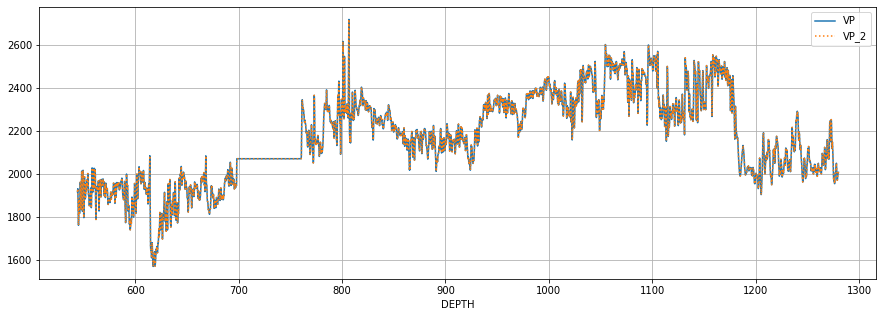

In [7]:
#5. Plot VP from sonic and VP from AI-RHOB logs and compare between them. any changes?
df.VP.plot(figsize=(15,5), grid=True, legend=True);
df.VP_2.plot(figsize=(15,5),linestyle='dotted', grid=True, legend=True);